In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import markers

In [2]:
sns.set_style('whitegrid')
all_shapes = list(markers.MarkerStyle.markers.keys())

# Grabbing homelessness data

Here is the csv file where we have the overall homelessness by US state in the last 10 years

In [3]:
raw_data = pd.read_csv('../data/overall_homelessness.csv', header=None)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       58 non-null     object
 1   1       58 non-null     object
 2   2       58 non-null     object
 3   3       58 non-null     object
 4   4       58 non-null     object
 5   5       58 non-null     object
 6   6       58 non-null     object
 7   7       58 non-null     object
 8   8       58 non-null     object
 9   9       58 non-null     object
 10  10      58 non-null     object
 11  11      58 non-null     object
dtypes: object(12)
memory usage: 5.6+ KB


In [5]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,State
1,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949,AK
2,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351,AL
3,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366,AR
4,,,,,,,,,,,,AS


## Some Data preproseccing
Let's make some data preprocessing:
1. Remove empty strings, like for the state American Samoa (SA)
2. Assign years as column name
3. Drop the entry for American Samoa and Total

In [6]:
# Assign state abbreviation as column names
df = raw_data.copy()
df = df.replace(" ", 0, regex=True)
df.columns = df.iloc[0]
df = df.drop(labels=[0, 4, 57], axis=0)
df.reset_index(inplace=True, drop=True)

In [7]:
df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,State
0,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949,AK
1,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351,AL
2,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366,AR
3,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979,AZ
4,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548,CA


Data preprocessing (continued)
1. Assign State column as index to ease the handling data
2. Rename de column index name for clarification
3. Convert values from object to numeric values

In [8]:
df.set_index('State', inplace=True)
df = df.rename_axis("Year", axis="columns")

df = df.apply(lambda x: x.astype('int'))

In [9]:
df.head()

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
AK,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949
AL,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351
AR,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366
AZ,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
CA,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548


# Visualizations

## How is the distribution of homelessness by state for each year?

Among the questions that can be answered:
- What are the states with higher homeless population?

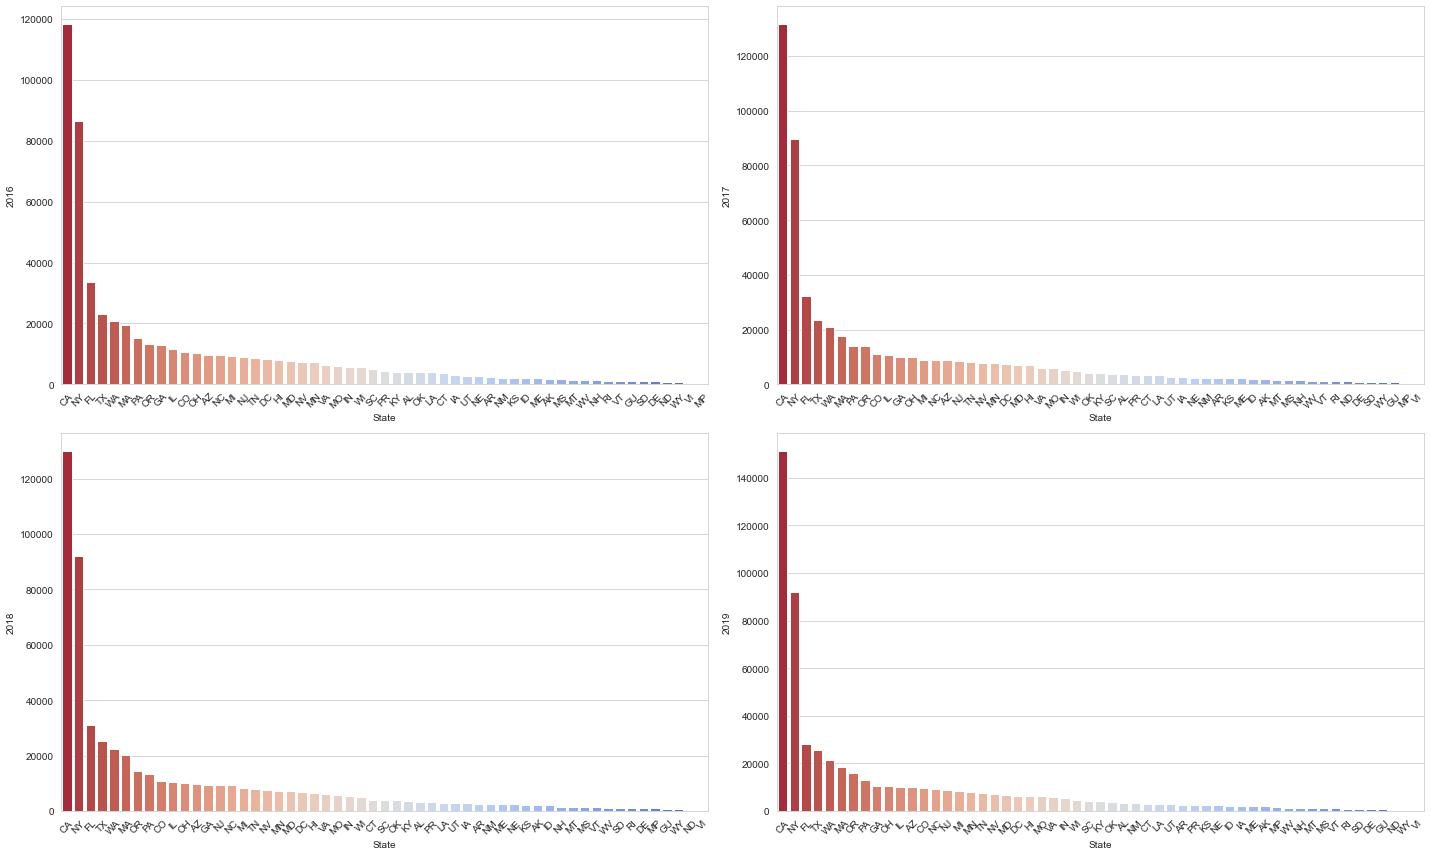

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for year, ax in zip(df.columns[-5:-1], axes.ravel()):
    df2 = df.sort_values(year, ascending=False)
    g = sns.barplot(x=df2.index, y=year, data=df2,
                    palette="coolwarm_r", ax=ax)
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 States Overall Homeless population from 2010 - 2020

Based on those figures CA is the state with higher homelessness population. Besides, there is not huge changes among the states with higher homelessnes population during the last 4 years.

Let's see what are the top 10 states

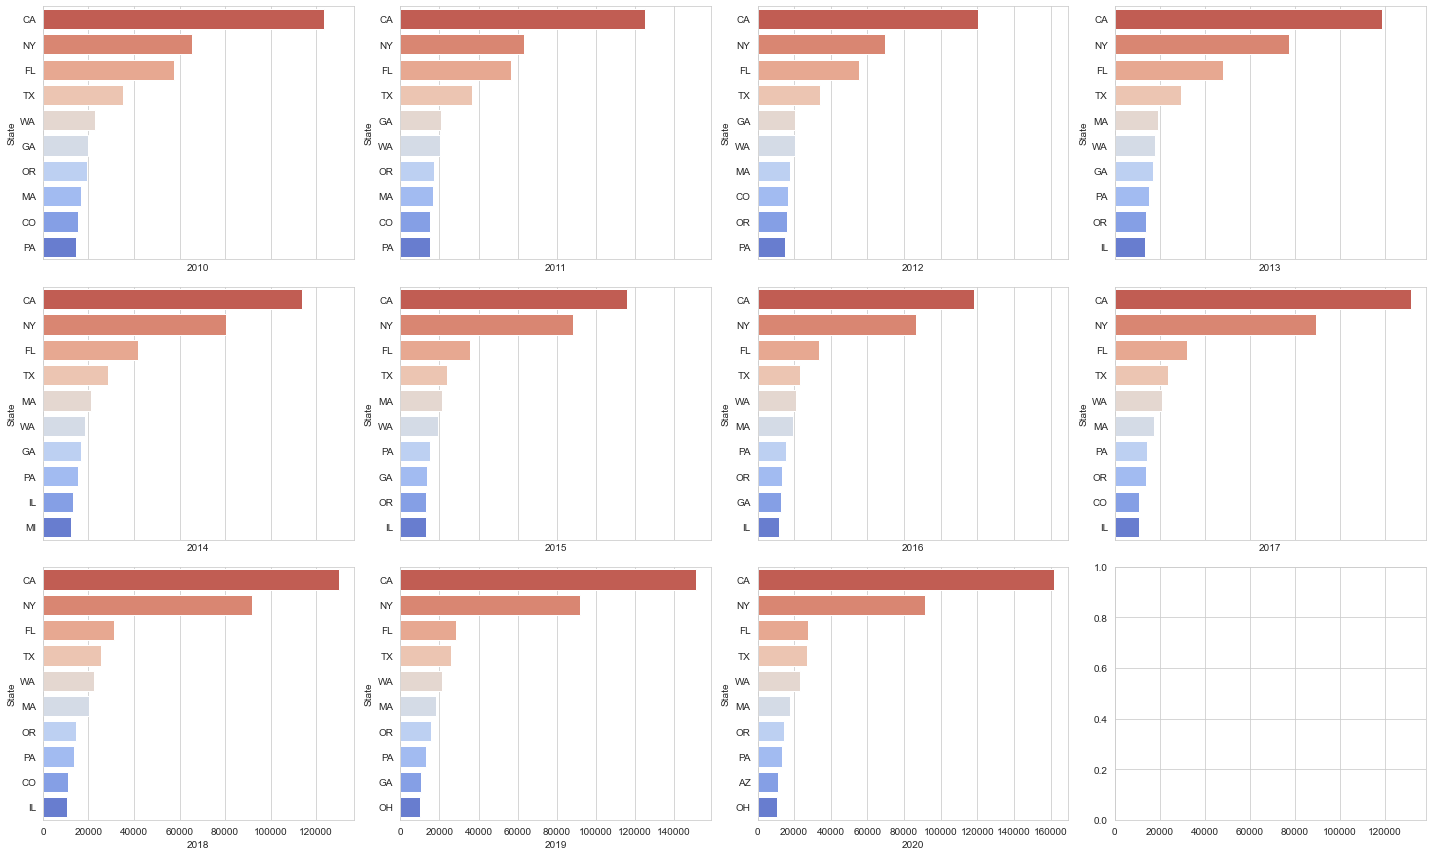

In [11]:
n_years = len(df.columns)

if n_years % 2 != 0:
    n_years = n_years + 1

fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex='col')
for year, ax in zip(df.columns, axes.ravel()):
    df2 = df.sort_values(year, ascending=False).head(10)
    _ = sns.barplot(y=df2.index, x=year, data=df2, 
                    palette="coolwarm_r", ax=ax, orient="h")
plt.tight_layout()

## Select the top 10 States with higher overall homelessness in the last 10 years

In [12]:
list_top_states = []
for year in df.columns:
    list_top_states.extend(df.sort_values(by=year, ascending=False).head(10).index.to_list())

top_states = list(set(list_top_states))

In [13]:
top_states_df = df.loc[top_states]

In [14]:
top_states_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
OH,12569,13030,13977,12325,11823,11182,10404,10095,10249,10345,10655
FL,57551,56687,55170,47862,41542,35900,33559,32190,31030,28328,27487
GA,19836,20975,20516,16971,16521,13790,12909,10174,9499,10443,10234
AZ,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
WA,22878,20439,20504,17760,18442,19419,20827,21112,22304,21577,22923
MA,16646,16664,17501,19029,21237,21135,19608,17565,20068,18471,17975
CO,15482,15116,16768,9754,10028,9953,10550,10940,10857,9619,9846
NY,65606,63445,69566,77430,80590,88250,86352,89503,91897,92091,91271
OR,19492,17254,15828,13822,12164,13226,13238,13953,14476,15876,14655


## How the homelessness population has changed over the time for the selected states

In [15]:
sns.set(font_scale=1.5)

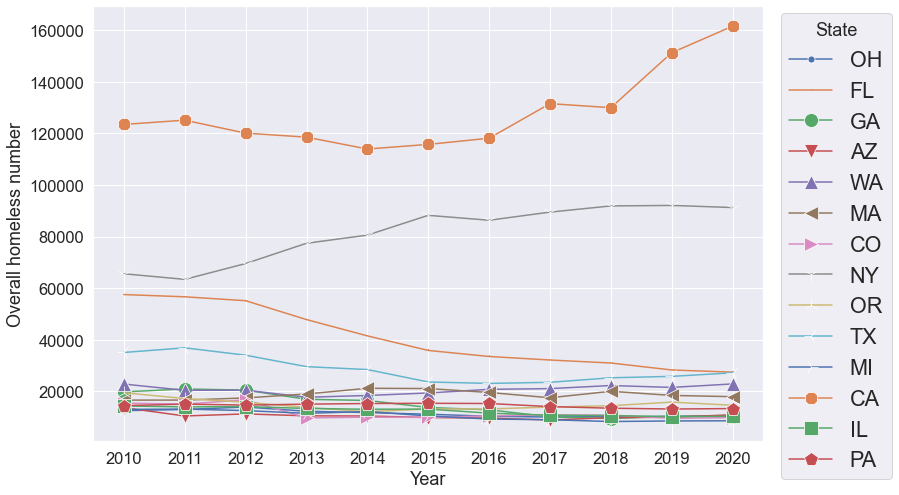

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, state in enumerate(top_states_df.index.to_list()):
    _ = sns.lineplot(data=top_states_df.loc[state],
                     palette='tab20',
                     marker=all_shapes[i], markersize=14)

ax.set_ylabel('Overall homeless number')
ax.legend(labels=top_states_df.index.to_list(), title = "State", 
           fontsize = 'large',
         bbox_to_anchor=(1.01, 1.01), loc="upper left")

plt.show()

Based on this figure, in the last 10 years, CA is the state where the homelessness population has increased the most from 2018 to 2020. The New York state has shown a continuous moderate homelessness increase.

In contrast, Florida has shown a continuous decrease since 2012. Let's see the behaviour of the rest of the states

In [17]:
out_state = ['CA', 'NY', 'FL']
new_top_states = [i for i in top_states_df.index.to_list() if i not in out_state]

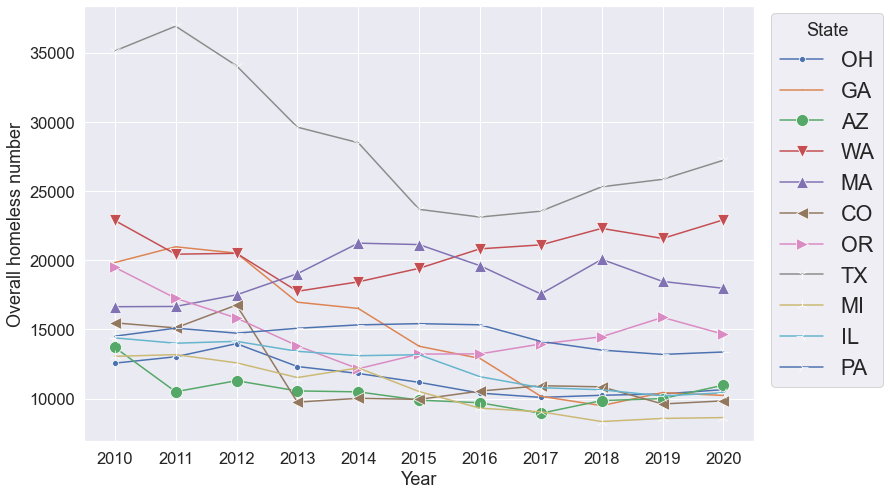

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, state in enumerate(new_top_states):
    _ = sns.lineplot(data=top_states_df.loc[state],
                     palette='tab20',
                     marker=all_shapes[i], markersize=12)

ax.set_ylabel('Overall homeless number')
ax.legend(labels=new_top_states, title = "State", 
           fontsize = 'large',
         bbox_to_anchor=(1.01, 1.01), loc="upper left")
plt.show()

Let's calculate the

In [19]:
change_perc = top_states_df.pct_change(axis=1)

In [20]:
change_perc['Accumulated'] = (top_states_df['2020'] - top_states_df['2010']) / top_states_df['2010']

In [21]:
change_perc = change_perc.mul(100).sort_values('Accumulated', ascending=False)

In [22]:
change_perc

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Accumulated
State,,,,,,,,,,,,
NY,NaN,-3.293906,9.647726,11.304373,4.081106,9.504901,-2.150708,3.649018,2.674771,0.211106,-0.890424,39.119898
CA,NaN,1.334629,-4.019884,-1.287282,-3.880154,1.567327,2.077105,11.333819,-1.186023,16.392762,6.788826,30.829284
MA,NaN,0.108134,5.022804,8.730930,11.603342,-0.480294,-7.224982,-10.419217,14.249929,-7.957943,-2.685290,7.983900
WA,NaN,-10.660897,0.318019,-13.382755,3.840090,5.297690,7.250631,1.368416,5.646078,-3.259505,6.238124,0.196696
PA,NaN,3.995591,-2.384738,2.375136,1.637280,0.573926,-0.531742,-7.829715,-4.427783,-2.316459,1.333434,-7.860292
OH,NaN,3.667754,7.267843,-11.819418,-4.073022,-5.421636,-6.957610,-2.970012,1.525508,0.936677,2.996617,-15.227942
AZ,NaN,-23.389979,7.597106,-6.547514,-0.634350,-5.707480,-1.909863,-7.829401,10.260422,1.439432,9.713201,-19.925607
TX,NaN,5.096666,-7.745658,-13.030072,-3.781867,-16.904720,-2.348171,1.842401,7.482589,2.125642,5.342773,-22.470886
OR,NaN,-11.481633,-8.264750,-12.673743,-11.995370,8.730681,0.090730,5.401118,3.748298,9.671180,-7.690854,-24.815309


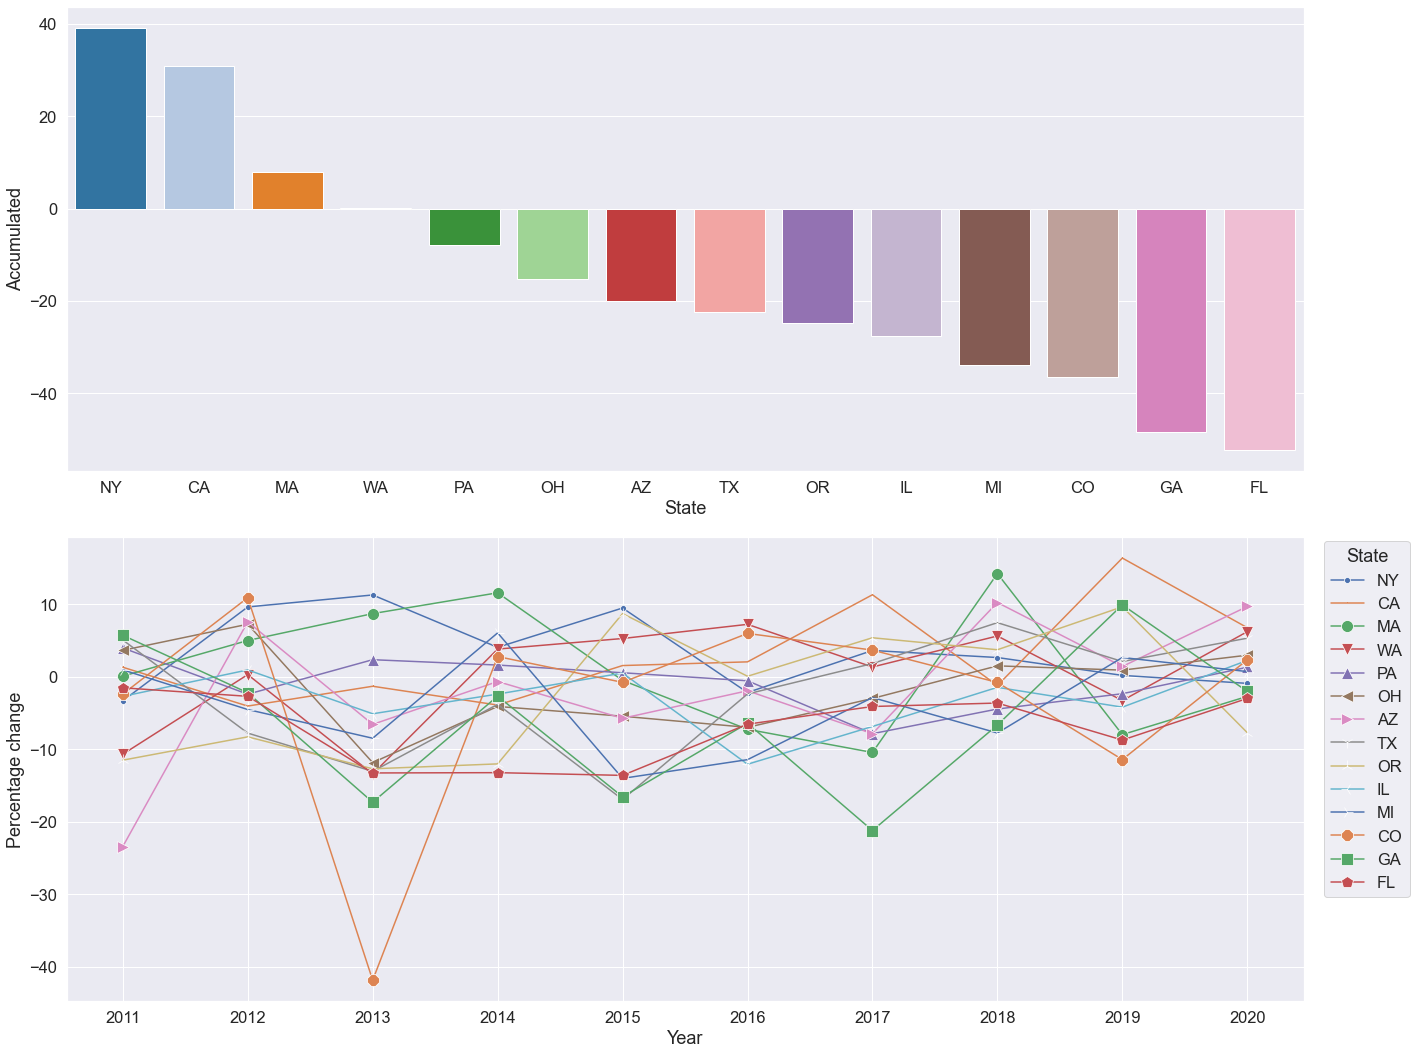

In [23]:
columns = change_perc.columns[1:-1]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
# First figure
_ = sns.barplot(x=change_perc.index, y='Accumulated', data=change_perc,
                palette='tab20', ax=ax1)

# Second figure
for i, state in enumerate(change_perc.index.to_list()):
    _ = sns.lineplot(data=change_perc.loc[state][columns],
                     palette='tab20',
                     marker=all_shapes[i], markersize=12, ax=ax2)

ax2.set_ylabel('Percentage change')
ax2.legend(labels=change_perc.index, title = "State",
          bbox_to_anchor=(1.01, 1.01), loc="upper left")
plt.tight_layout()
plt.show()